Fonte de dados: CAMELS-BR

C:\Users\dodo_\AppData\Local\Temp\ipykernel_3116\1099653938.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['date'] = pd.to_datetime(df_cleaned[['year', 'month', 'day']])


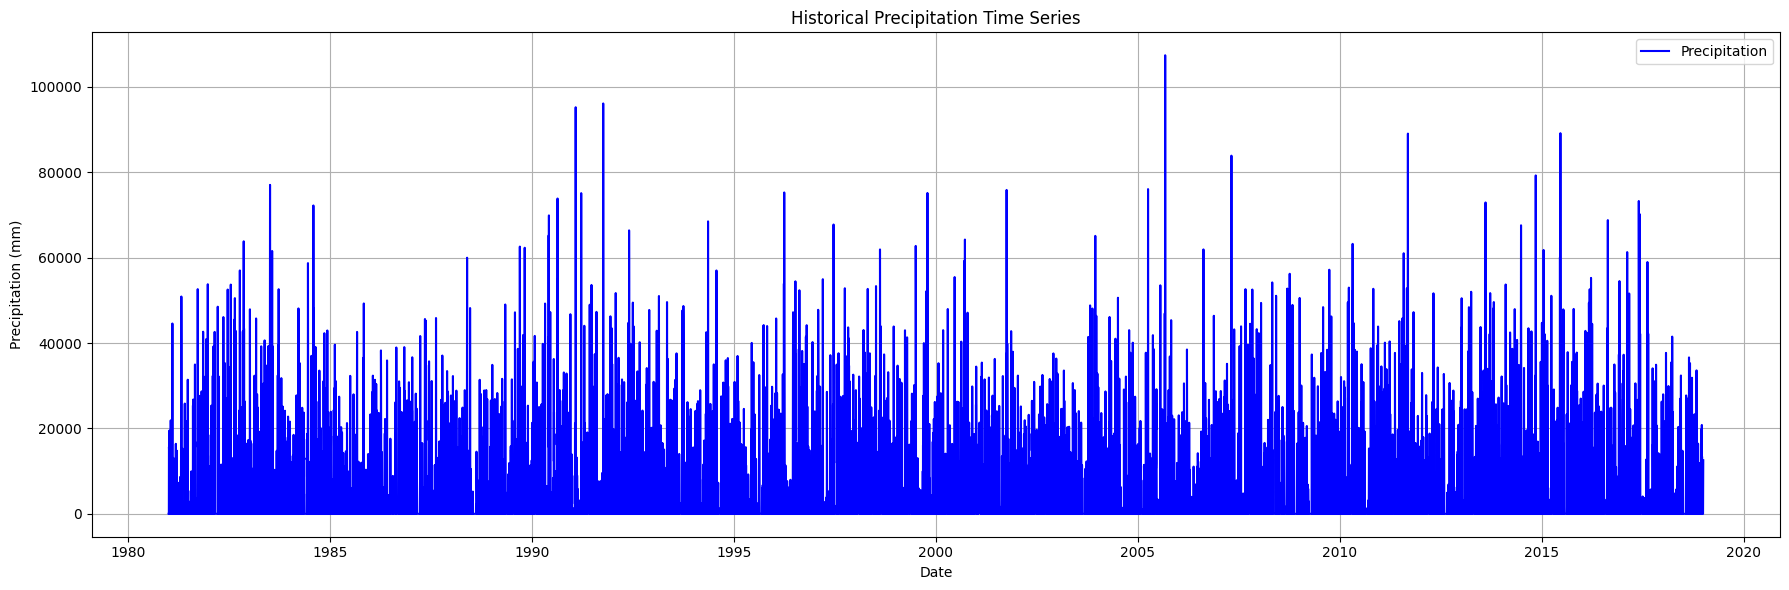

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# Lê o arquivo de origem
file_path = 'C:/Users/dodo_/Documents/ENS5165_202402/ENS5165_202402/pyEnv/files/Precipatacao - 72715000 - TANGARA.xlsx'

# Carregar os dados do Excel
df = pd.read_excel(file_path, sheet_name='precipitation')

# Converte a coluna 'precipitation' para numérico, tratando 'NaN' como valores ausentes
df['precipitation'] = pd.to_numeric(df['precipitation'], errors='coerce')

# Remove as linhas com valores NaN em 'precipitation'
df_cleaned = df.dropna(subset=['precipitation'])

# Cria uma coluna de data combinando 'year', 'month', e 'day'
df_cleaned['date'] = pd.to_datetime(df_cleaned[['year', 'month', 'day']])

# Plota a série histórica de precipitação
plt.figure(figsize=(18, 6))
plt.plot(df_cleaned['date'], df_cleaned['precipitation'], label='Precipitation', color='b')
plt.title('Historical Precipitation Time Series')
plt.xlabel('Date')
plt.ylabel('Precipitation (mm)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

C:\Users\dodo_\AppData\Local\Temp\ipykernel_3116\3901103234.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['date'] = pd.to_datetime(df_cleaned[['year', 'month', 'day']])
C:\Users\dodo_\AppData\Local\Temp\ipykernel_3116\3901103234.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['precipitation_30d_ma'] = df_cleaned['precipitation'].rolling(window=30).mean()


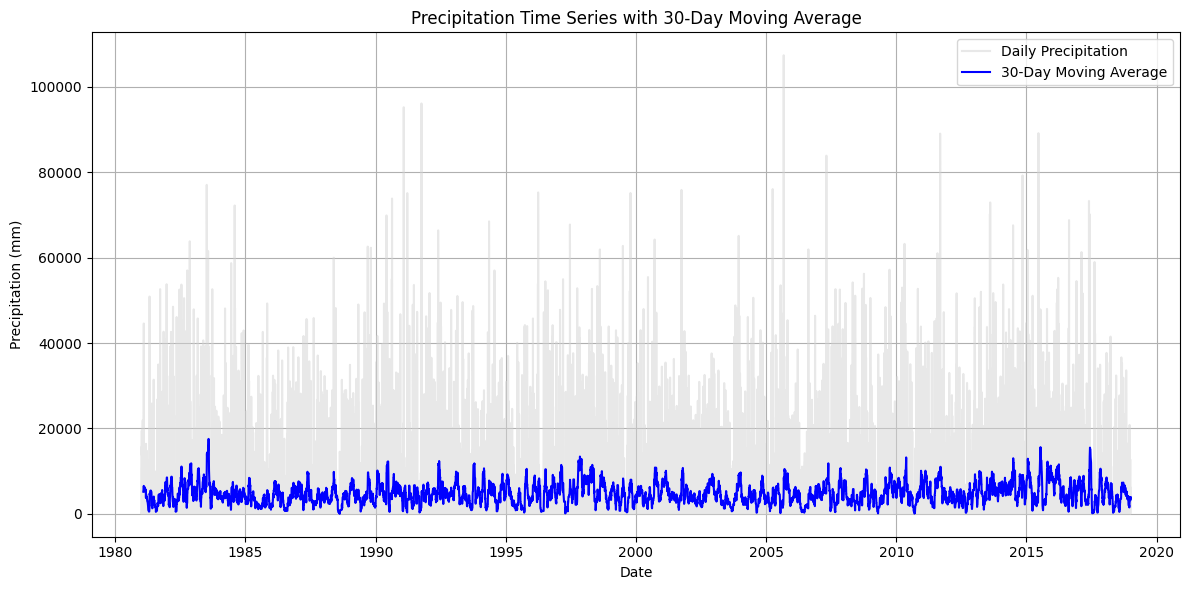

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

# Lê o arquivo de origem
file_path = 'C:/Users/dodo_/Documents/ENS5165_202402/ENS5165_202402/pyEnv/files/Precipatacao - 72715000 - TANGARA.xlsx'

# Carregar os dados do Excel
df = pd.read_excel(file_path, sheet_name='precipitation')

# Converte a coluna 'precipitation' para numérico, tratando 'NaN' como valores ausentes
df['precipitation'] = pd.to_numeric(df['precipitation'], errors='coerce')

# Remove as linhas com valores NaN em 'precipitation'
df_cleaned = df.dropna(subset=['precipitation'])

# Cria uma coluna de data combinando 'year', 'month', e 'day'
df_cleaned['date'] = pd.to_datetime(df_cleaned[['year', 'month', 'day']])

# Calcula uma média móvel de 30 dias
df_cleaned['precipitation_30d_ma'] = df_cleaned['precipitation'].rolling(window=30).mean()

# Plota a série histórica com a média móvel
plt.figure(figsize=(12, 6))

# Série original
plt.plot(df_cleaned['date'], df_cleaned['precipitation'], label='Daily Precipitation', color='lightgray', alpha=0.5)

# Série com média móvel de 30 dias
plt.plot(df_cleaned['date'], df_cleaned['precipitation_30d_ma'], label='30-Day Moving Average', color='blue')

# Configuração do gráfico
plt.title('Precipitation Time Series with 30-Day Moving Average')
plt.xlabel('Date')
plt.ylabel('Precipitation (mm)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

C:\Users\dodo_\AppData\Local\Temp\ipykernel_11928\1776532557.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['date'] = pd.to_datetime(df_cleaned[['year', 'month', 'day']])
C:\Users\dodo_\AppData\Local\Temp\ipykernel_11928\1776532557.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['precipitation_30d_ma'] = df_cleaned['precipitation'].rolling(window=30).mean()
C:\Users\dodo_\AppData\Local\Temp\ipykernel_11928\1776532557.py:25: SettingWithCopyWarning: 
A value is trying to be se

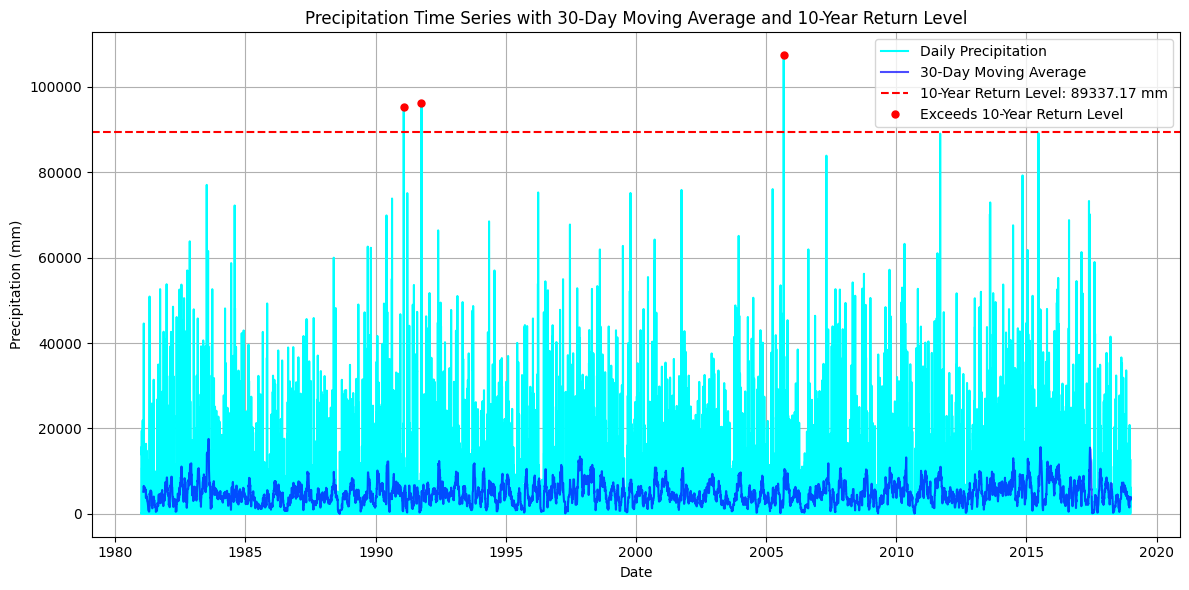

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gumbel_r

# Lê o arquivo de origem
file_path = 'C:/Users/dodo_/Documents/ENS5165_202402/ENS5165_202402/pyEnv/files/Precipatacao - 72715000 - TANGARA.xlsx'

# Carregar os dados do Excel
df = pd.read_excel(file_path, sheet_name='precipitation')

# Converte a coluna 'precipitation' para numérico, tratando 'NaN' como valores ausentes
df['precipitation'] = pd.to_numeric(df['precipitation'], errors='coerce')

# Remove as linhas com valores NaN em 'precipitation'
df_cleaned = df.dropna(subset=['precipitation'])

# Cria uma coluna de data combinando 'year', 'month', e 'day'
df_cleaned['date'] = pd.to_datetime(df_cleaned[['year', 'month', 'day']])

# Calcula uma média móvel de 30 dias
df_cleaned['precipitation_30d_ma'] = df_cleaned['precipitation'].rolling(window=30).mean()

# Extrair o valor máximo de precipitação por ano
df_cleaned['year'] = df_cleaned['date'].dt.year
annual_max = df_cleaned.groupby('year')['precipitation'].max().dropna()

# Ajustar a distribuição de Gumbel aos dados de máximos anuais
params = gumbel_r.fit(annual_max)
mu, beta = params

# Definir o tempo de retorno desejado
return_period = 10  # Tempo de retorno de 10 anos
prob_exceedance = 1 / return_period

# Calcular o valor de precipitação para o tempo de retorno
precipitation_return_level = gumbel_r.ppf(1 - prob_exceedance, loc=mu, scale=beta)

# Identificar os pontos que excedem o nível de retorno
above_return_level = df_cleaned['precipitation'] > precipitation_return_level

# Plota a série histórica com a média móvel e a linha de tempo de retorno
plt.figure(figsize=(12, 6))

# Série original
plt.plot(df_cleaned['date'], df_cleaned['precipitation'], label='Daily Precipitation', color='cyan')

# Série com média móvel de 30 dias
plt.plot(df_cleaned['date'], df_cleaned['precipitation_30d_ma'], label='30-Day Moving Average', color='blue', alpha=0.7)

# Linha do tempo de retorno de 10 anos
plt.axhline(y=precipitation_return_level, color='red', linestyle='--', label=f'10-Year Return Level: {precipitation_return_level:.2f} mm')

# Marcação dos pontos que excedem o nível de retorno
plt.plot(df_cleaned['date'][above_return_level], df_cleaned['precipitation'][above_return_level], 'ro', markersize=5, label='Exceeds 10-Year Return Level')

# Configuração do gráfico
plt.title('Precipitation Time Series with 30-Day Moving Average and 10-Year Return Level')
plt.xlabel('Date')
plt.ylabel('Precipitation (mm)')
plt.legend()
plt.grid(True)
plt.tight_layout()


C:\Users\dodo_\AppData\Local\Temp\ipykernel_11928\1544976381.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['date'] = pd.to_datetime(df_cleaned[['year', 'month', 'day']])
C:\Users\dodo_\AppData\Local\Temp\ipykernel_11928\1544976381.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['precipitation_30d_ma'] = df_cleaned['precipitation'].rolling(window=30).mean()
C:\Users\dodo_\AppData\Local\Temp\ipykernel_11928\1544976381.py:25: SettingWithCopyWarning: 
A value is trying to be se

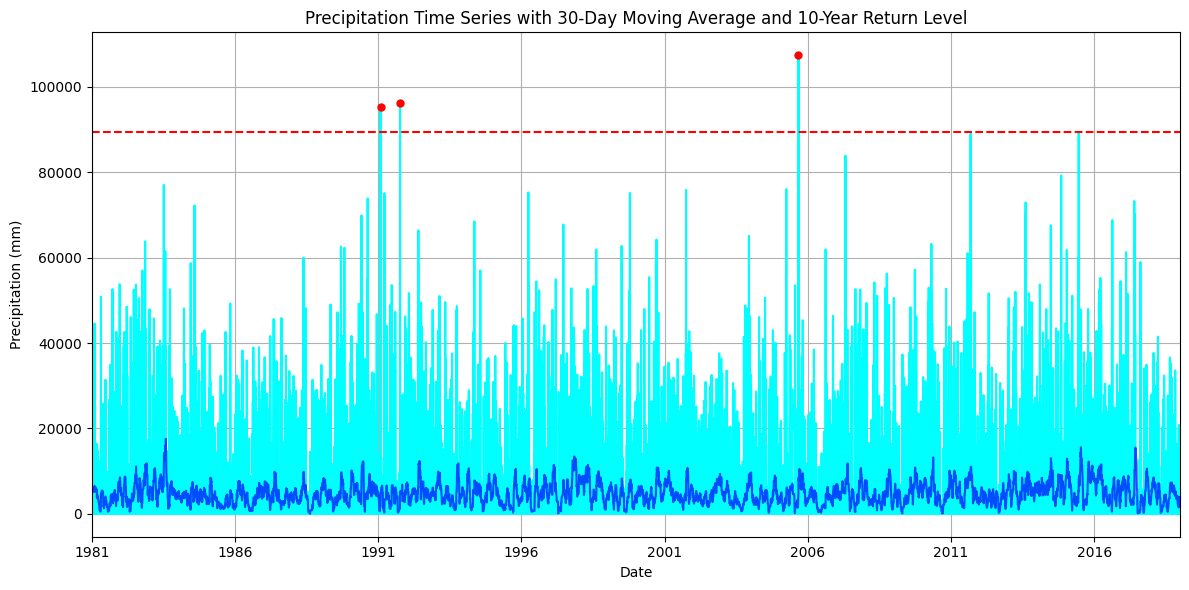

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gumbel_r

# Lê o arquivo de origem
file_path = 'C:/Users/dodo_/Documents/ENS5165_202402/ENS5165_202402/pyEnv/files/Precipatacao - 72715000 - TANGARA.xlsx'

# Carregar os dados do Excel
df = pd.read_excel(file_path, sheet_name='precipitation')

# Converte a coluna 'precipitation' para numérico, tratando 'NaN' como valores ausentes
df['precipitation'] = pd.to_numeric(df['precipitation'], errors='coerce')

# Remove as linhas com valores NaN em 'precipitation'
df_cleaned = df.dropna(subset=['precipitation'])

# Cria uma coluna de data combinando 'year', 'month', e 'day'
df_cleaned['date'] = pd.to_datetime(df_cleaned[['year', 'month', 'day']])

# Calcula uma média móvel de 30 dias
df_cleaned['precipitation_30d_ma'] = df_cleaned['precipitation'].rolling(window=30).mean()

# Extrair o valor máximo de precipitação por ano
df_cleaned['year'] = df_cleaned['date'].dt.year
annual_max = df_cleaned.groupby('year')['precipitation'].max().dropna()

# Ajustar a distribuição de Gumbel aos dados de máximos anuais
params = gumbel_r.fit(annual_max)
mu, beta = params

# Definir o tempo de retorno desejado
return_period = 10  # Tempo de retorno de 10 anos
prob_exceedance = 1 / return_period

# Calcular o valor de precipitação para o tempo de retorno
precipitation_return_level = gumbel_r.ppf(1 - prob_exceedance, loc=mu, scale=beta)

# Identificar os pontos que excedem o nível de retorno
above_return_level = df_cleaned['precipitation'] > precipitation_return_level

# Plota a série histórica com a média móvel e a linha de tempo de retorno
plt.figure(figsize=(12, 6))

# Série original
plt.plot(df_cleaned['date'], df_cleaned['precipitation'], label='Daily Precipitation', color='cyan')

# Série com média móvel de 30 dias
plt.plot(df_cleaned['date'], df_cleaned['precipitation_30d_ma'], label='30-Day Moving Average', color='blue', alpha=0.7)

# Linha do tempo de retorno de 10 anos
plt.axhline(y=precipitation_return_level, color='red', linestyle='--', label=f'10-Year Return Level: {precipitation_return_level:.2f} mm')

# Marcação dos pontos que excedem o nível de retorno
plt.plot(df_cleaned['date'][above_return_level], df_cleaned['precipitation'][above_return_level], 'ro', markersize=5, label='Exceeds 10-Year Return Level')

# Configuração do gráfico
plt.title('Precipitation Time Series with 30-Day Moving Average and 10-Year Return Level')
plt.xlabel('Date')
plt.ylabel('Precipitation (mm)')

# Definir limites do eixo x para começar e terminar conforme os dados
plt.xlim(df_cleaned['date'].min(), df_cleaned['date'].max())

# Calcular os anos para os rótulos do eixo x (múltiplos de 5)
start_year = df_cleaned['date'].min().year
end_year = df_cleaned['date'].max().year
years = list(range(start_year, end_year + 1, 5))

# Adicionar rótulos de ticks no eixo x com os anos múltiplos de 5
plt.xticks(pd.to_datetime([f'{year}-01-01' for year in years]), years)

# Ajustar a posição da legenda
plt.legend
plt.grid(True)
plt.tight_layout()
plt.show()
